In [2]:
import pandas as pd
import numpy as np
import os

In [4]:
sales = pd.read_csv('sales_data.csv')
sales.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,rating
0,549235,22149,FELTCRAFT 6 FLOWER FRIENDS,3,2011-04-07 11:16:00,2.10,17403,United Kingdom,3
1,570036,22560,TRADITIONAL MODELLING CLAY,24,2011-10-07 10:50:00,1.25,11208,United Kingdom,4
2,547800,21790,VINTAGE SNAP CARDS,2,2011-03-25 12:55:00,0.85,11634,United Kingdom,4
3,538894,22464,HANGING METAL HEART LANTERN,6,2010-12-14 17:22:00,1.65,17249,United Kingdom,4
4,538073,47504K,ENGLISH ROSE GARDEN SECATEURS,1,2010-12-09 14:10:00,1.95,17360,United Kingdom,3


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
transaction id           100000 non-null object
product id               100000 non-null object
product description      100000 non-null object
quantity sold            100000 non-null int64
transaction timestamp    100000 non-null object
unit price               100000 non-null float64
customer id              100000 non-null int64
transaction country      100000 non-null object
rating                   100000 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


In [9]:
sales.describe()

,quantity sold,unit price,customer id,rating
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,12.101380,3.285189,15381.152680,3.594720
std,364.899962,24.114983,2656.885172,1.321252
min,-80995.000000,0.000000,10777.000000,1.000000
25%,2.000000,1.250000,13082.000000,3.000000
50%,5.000000,1.950000,15391.500000,4.000000
75%,12.000000,3.750000,17681.000000,5.000000
max,80995.000000,4161.060000,19991.000000,5.000000


In [5]:
q1,q3 = sales['quantity sold'].quantile([0.25,0.75])
iqr = q3-q1

sales['quantity sold'] = np.where(sales['quantity sold']>q3+(1.5*iqr),q3+(1.5*iqr),sales['quantity sold'])
sales['quantity sold'] = np.where(sales['quantity sold']<q1-(1.5*iqr),q1-(1.5*iqr),sales['quantity sold'])

In [21]:
sales.describe()

,quantity sold,unit price,customer id,rating
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.044090,3.285189,15381.152680,3.594720
std,8.241822,24.114983,2656.885172,1.321252
min,-13.000000,0.000000,10777.000000,1.000000
25%,2.000000,1.250000,13082.000000,3.000000
50%,5.000000,1.950000,15391.500000,4.000000
75%,12.000000,3.750000,17681.000000,5.000000
max,27.000000,4161.060000,19991.000000,5.000000


In [7]:
cust = pd.read_csv('customer_data.csv')
cust.head(3)

,customer id,gender,age,annual income(k$),score
0,17403,Male,56,56,32
1,11208,Male,67,64,30
2,11634,Female,47,56,32


In [105]:
# cust['annual income(k$)'] = np.where(cust['age']>25 , np.random.choice(range(20,50),size=1),cust['annual income(k$)'])
# cust['annual income(k$)'] = np.where(cust['age']>35 , np.random.choice(range(40,80),size=1),cust['annual income(k$)'])
# cust['annual income(k$)'] = np.where(cust['age']>45 , np.random.choice(range(50,100),size=1),cust['annual income(k$)'])
# cust['annual income(k$)'] = np.where(cust['age']>65 , np.random.choice(range(30,130),size=1),cust['annual income(k$)'])


# cust['score'] = np.where(cust['age']>30 , np.random.choice(range(40,95),size=1),cust['score'])
# cust['score'] = np.where(cust['age']>45 , np.random.choice(range(20,60),size=1),cust['score'])
# cust['score'] = np.where(cust['age']>60 , np.random.choice(range(20,40),size=1),cust['score'])
# cust['score'] = np.where(cust['score']>99 , np.random.choice(range(10,80),size=1),cust['score'])

In [74]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 5 columns):
customer id          9215 non-null int64
gender               9215 non-null object
age                  9215 non-null int64
annual income(k$)    9215 non-null int64
score                9215 non-null int64
dtypes: int64(4), object(1)
memory usage: 360.0+ KB


In [108]:
cust.describe()

,customer id,age,annual income(k$),score
count,9215.000000,9215.000000,9215.000000,9215.000000
mean,15384.000000,43.218123,59.374390,45.246880
std,2660.285699,15.156107,14.989101,17.999576
min,10777.000000,18.000000,15.000000,15.000000
25%,13080.500000,30.000000,47.000000,32.000000
50%,15384.000000,43.000000,56.000000,32.000000
75%,17687.500000,55.000000,74.000000,61.000000
max,19991.000000,70.000000,137.000000,99.000000


In [5]:
len(cust['customer id'].unique())

9215

In [109]:
cust[['age','annual income(k$)','score']].corr()

,age,annual income(k$),score
age,1.000000,0.059783,-0.541501
annual income(k$),0.059783,1.000000,0.333643
score,-0.541501,0.333643,1.000000


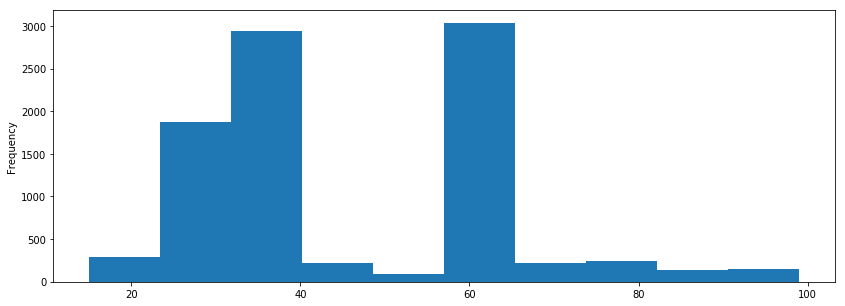

In [106]:
cust['score'].plot(kind ='hist')

### MERGING THE DATA FOR FURTHER ANALYSIS

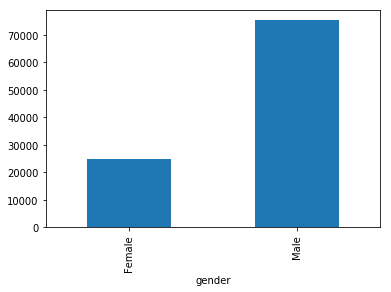

In [12]:
full = pd.merge(sales,cust,on='customer id')

full.groupby(['gender'])['transaction id'].count().plot(kind = 'bar')

#### Given the sales transaction data we want to assess the performance of the company. Is the company's performance improving or degrading over time? 

In [8]:
sales['transaction timestamp'] = pd.to_datetime(sales['transaction timestamp'])

In [9]:
sales['transaction timestamp'].min(),sales['transaction timestamp'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [10]:
sales['Month'] = sales['transaction timestamp'].dt.month
sales['Year'] = sales['transaction timestamp'].dt.year

In [11]:
sales.head(2)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,rating,Month,Year
0,549235,22149,FELTCRAFT 6 FLOWER FRIENDS,3.0,2011-04-07 11:16:00,2.10,17403,United Kingdom,3,4,2011
1,570036,22560,TRADITIONAL MODELLING CLAY,24.0,2011-10-07 10:50:00,1.25,11208,United Kingdom,4,10,2011


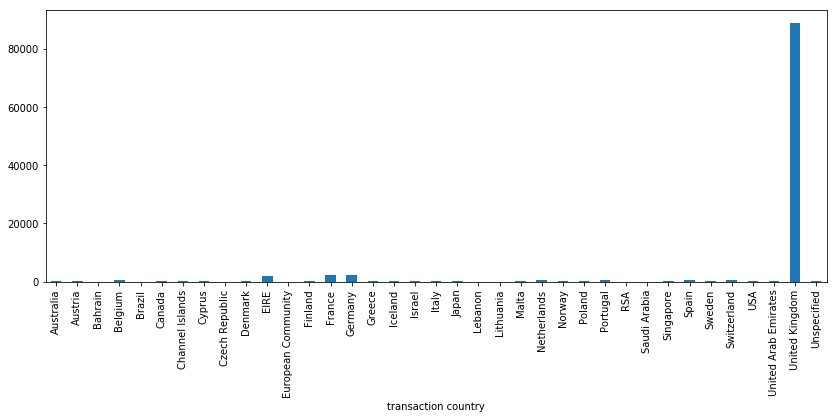

In [52]:
plt.rcParams['figure.figsize'] = [14,5]

sales.groupby('transaction country')['transaction id'].count().plot(kind = 'bar')

In [55]:
sales.groupby(['Year','Month'])['quantity sold'].sum()

Year  Month
2010  12       296362
2011  1        269379
      2        262833
      3        344012
      4        278585
      5        367852
      6        356922
      7        363418
      8        386612
      9        537496
      10       569666
      11       669915
      12       203836
Name: quantity sold, dtype: int64

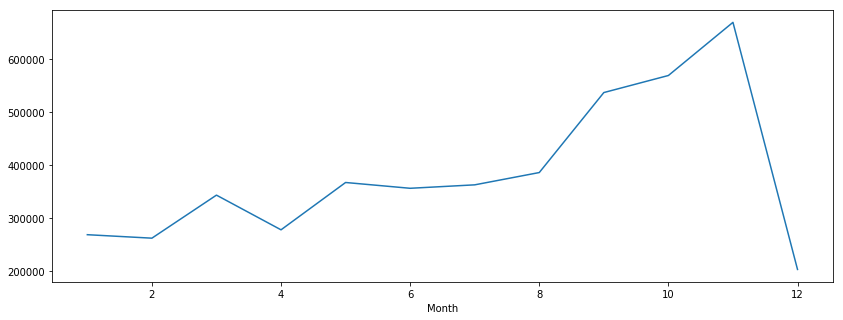

In [57]:
import matplotlib.pyplot as plt

sales[sales.Year == 2011].groupby('Month')['quantity sold'].sum().plot('line') ### Total sales are increasing with some lows across the year

## only 9 days were recorded in december so the graph falls

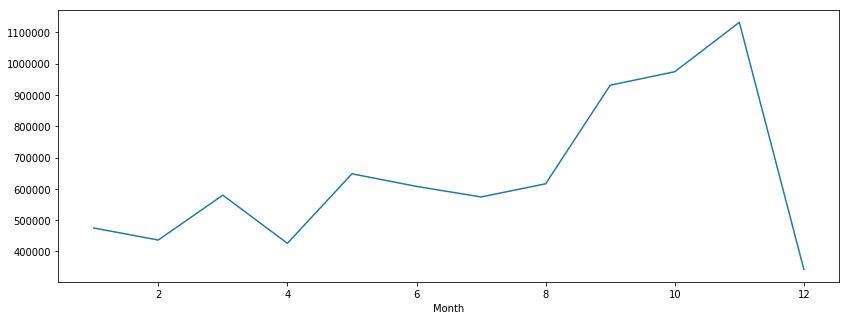

In [58]:
sales['sale'] = sales['quantity sold'] * sales['unit price']

sales[sales.Year == 2011].groupby('Month')['sale'].sum().plot('line') ### Total money made is also increasing with similar pattern

## only 9 days were recorded in december so the graph falls

In [37]:
sales.head(2)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,Month,sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [64]:
sales.groupby(['customer id','transaction id','Month'])['Month'].count().head(10)

customer id  transaction id  Month
12346        541431          1         1
             C541433         1         1
12347        537626          12       31
             542237          1        29
             549222          4        24
             556201          6        18
             562032          8        22
             573511          10       47
             581180          12       11
12348        539318          12       17
Name: Month, dtype: int64

In [70]:
sales_yw = sales.groupby(['Month','Year'])['quantity sold'].sum()
sales_yw

Month  Year
1      2011    269379
2      2011    262833
3      2011    344012
4      2011    278585
5      2011    367852
6      2011    356922
7      2011    363418
8      2011    386612
9      2011    537496
10     2011    569666
11     2011    669915
12     2010    296362
       2011    203836
Name: quantity sold, dtype: int64

#### GENDER OF THE CUSOMERS

In [90]:
cust.groupby('gender')['customer id'].count().reset_index()

,gender,customer id
0,Female,1481
1,Male,2891


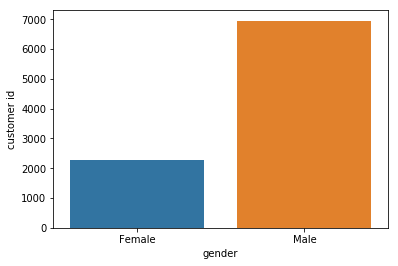

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6,4]

sb.barplot(x="gender",y = 'customer id', data=cust.groupby('gender')['customer id'].count().reset_index())

#### AGE OF THE CUSOMERS

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


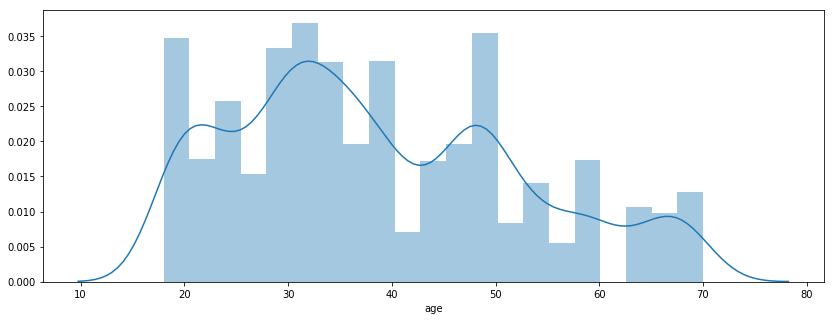

In [79]:
import seaborn as sb
plt.rcParams['figure.figsize'] = [14,5]
sb.distplot(cust['age'])

#### INCOME OF THE CUSOMERS

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


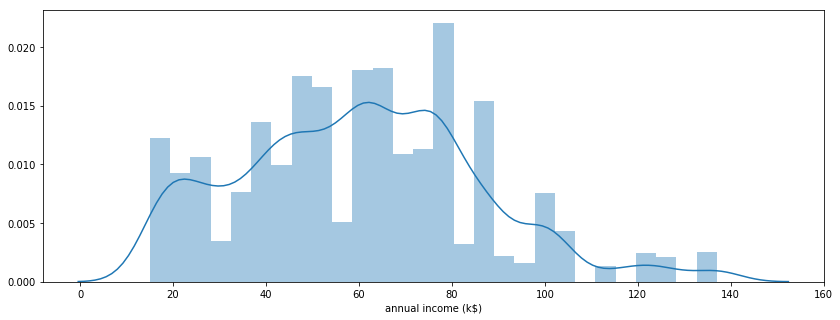

In [80]:
sb.distplot(cust['annual income(k$)'])

#### SPENDING OF THE CUSOMERS

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


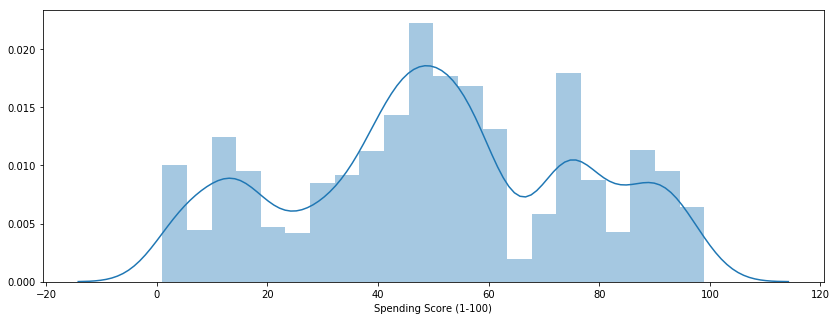

In [81]:
sb.distplot(cust['score'])

## FURTHER ANALYSIS AND INSIGHTS

#### 1. Refferal offers to Low income medium/high Spend customers

In [77]:
cust[['customer id','annual income(k$)','score']].sort_values(by=['annual income(k$)','score'],ascending = [True,False]).head()

,customer id,annual income(k$),score
541,18618,15,15
1128,19838,15,15
1307,18610,15,15
1501,15988,15,15
2056,19272,15,15


#### 2. More offers to high income low/medium spend customers

In [79]:
cust[['customer id','annual income(k$)','score']].sort_values(by=['annual income(k$)','score'],ascending = [False,True]).head()

,customer id,annual income(k$),score
33,12766,137,27
395,12049,137,27
901,14395,137,27
1213,17813,137,27
1437,11976,137,27


#### Customer loyalty is same customer making purchases several times.

In [22]:
sales.head(2)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,rating,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5,12,2010


In [29]:
lc = sales.groupby(['customer id'])['transaction id'].count().reset_index().sort_values('transaction id',ascending = False).head(100)
lc.head()

,customer id,transaction id
4042,17841,7983
1895,14911,5903
1300,14096,5128
330,12748,4642
1674,14606,2782


#### what are the items they are purchasing most and list them. Suggest to give special discounts on those items and send mailers to those customers to enhance sales.

In [33]:
offers_to_send_loyal_cust = sales[sales['customer id'].isin(list(lc['customer id']))][['customer id','product description']].groupby('customer id')['product description'].apply(list)
offers_to_send_loyal_cust.head(3)

customer id
12415    [RIBBON REEL LACE DESIGN , RIBBON REEL HEARTS ...
12471    [SET 7 BABUSHKA NESTING BOXES, SET OF 72 RETRO...
12540    [ROTATING SILVER ANGELS T-LIGHT HLDR, HOME SWE...
Name: product description, dtype: object

#### INACTIVE CUSTOMERS ( Special Come back offers to these inactive customers)

In [74]:
inac = []
sales2011 = sales[sales.Year == 2011]
for cus in sales2011['customer id'].unique():

    fp = min(sales2011[sales2011['customer id'] == cust].groupby(['transaction id'])['transaction timestamp'].min())
    lp = max(sales2011[sales2011['customer id'] == cust].groupby(['transaction id'])['transaction timestamp'].max())
        
    if fp == lp:
        inac.append(cus)
    elif 12 - lp.month >3:
        inac.append(cus)
    else:
        pass

In [69]:
len(inac)

1890

#### How can we measure our performance in terms of customer Acquisition and building customer loyalty?

In [65]:
cus={}
acq = {}
for i in range(13):
    if i == 0:
        cus['2010 intial cust - '] = sales[(sales.Year == 2010) & (sales.Month == 12)]['customer id'].unique()
        acq['2010 customers'] = len(cus['2010 intial cust - '])
    else:
        cus[i] = sales[(sales.Year == 2011) & (sales.Month == i)]['customer id'].unique()
        if (i>1) & (i <10):
            acq['2011 new cust in month - ' + str(i)] = len([c for c in cus[i] if c not in cus[i-1]])
        elif i>9:
            acq['2011 new cust in month = ' + str(i)] = len([c for c in cus[i] if c not in cus[i-1]])
        else:
            acq['2011 new cust in month = ' + str(i)] = len([c for c in cus[i] if c not in cus['2010 intial cust - ']])

In [66]:
acq

{'2010 customers': 948,
 '2011 new cust in month - 2': 499,
 '2011 new cust in month - 3': 675,
 '2011 new cust in month - 4': 553,
 '2011 new cust in month - 5': 680,
 '2011 new cust in month - 6': 587,
 '2011 new cust in month - 7': 578,
 '2011 new cust in month - 8': 547,
 '2011 new cust in month - 9': 837,
 '2011 new cust in month = 1': 421,
 '2011 new cust in month = 10': 873,
 '2011 new cust in month = 11': 1021,
 '2011 new cust in month = 12': 243}

#### Cancelled Orders

In [12]:
cancelled = list(filter(lambda x : str(x)[0] == 'C' , list(sales['transaction id'])))
cancelled[1:10]

['C567919',
 'C560905',
 'C562097',
 'C539100',
 'C562594',
 'C577345',
 'C557842',
 'C542792',
 'C571860']

In [17]:
len(cancelled)

2244

In [24]:
cancel_cust = sales[sales['transaction id'].isin(cancelled)]['customer id']
cancel_cust.head(5)

18     18252
82     13606
109    13344
110    17502
111    11354
Name: customer id, dtype: int64

In [26]:
from collections import Counter

cc = Counter(cancel_cust)
cc = sorted(cc.items(), key=lambda x: x[1], reverse=True)
cc[:5]

[(18018, 4), (13184, 3), (17540, 3), (14773, 3), (17123, 3)]

In [28]:
frq_can_cust = [x[0] for x in cc if x[1]>=3]
frq_can_cust

[18018,
 13184,
 17540,
 14773,
 17123,
 14830,
 14070,
 14742,
 15391,
 18554,
 11091,
 12331,
 15065,
 17569,
 11682,
 12278]

In [31]:
cust[cust['customer id'].isin(frq_can_cust)][["age","annual income(k$)","score"]].describe()

,age,annual income(k$),score
count,16.000000,16.000000,16.000000
mean,36.437500,53.625000,39.000000
std,11.189094,13.485177,14.343407
min,19.000000,20.000000,17.000000
25%,28.250000,47.000000,32.000000
50%,35.500000,56.000000,33.000000
75%,46.000000,56.250000,47.250000
max,54.000000,74.000000,61.000000


# RFM-analysis (Receny,Frequency,Monetary Value )

In [124]:
import datetime as dt
NOW = dt.date(2011,12,10)

In [118]:
sales['date'] = sales['transaction timestamp'].dt.date
sales['total sale'] = sales['quantity sold'] * sales['unit price']

In [138]:
rfm_df = sales.groupby('customer id').agg({'date': lambda x: (NOW - x.max()).days, 'transaction id': lambda x: len(x),'total sale': lambda x: x.sum()})
rfm_df['date'] = rfm_df['date'].astype(int)
rfm_df.rename(columns={'date': 'recency', 'transaction id': 'frequency','total sale': 'monetary_value'}, inplace=True)

In [139]:
rfm_df.head()

,recency,frequency,monetary_value
customer id,,,
10777,18,11,188.02
10778,29,12,222.84
10779,2,13,156.20
10780,31,14,306.75
10781,44,11,134.62


In [140]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,5.0,9.0,111.755
0.50,13.0,11.0,170.740
0.75,25.0,13.0,261.710


In [141]:
q = quantiles.to_dict()
q

{'frequency': {0.25: 9.0, 0.5: 11.0, 0.75: 13.0},
 'monetary_value': {0.25: 111.75500000000001, 0.5: 170.74, 0.75: 261.71},
 'recency': {0.25: 5.0, 0.5: 13.0, 0.75: 25.0}}

### CUSTOMER SEGEMNTATION (using RFM)

In [142]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [143]:
rfm_seg_df = rfm_df

rfm_seg_df['R_Quartile'] = rfm_seg_df['recency'].apply(RClass, args=('recency',quantiles,))
rfm_seg_df['F_Quartile'] = rfm_seg_df['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_seg_df['M_Quartile'] = rfm_seg_df['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))


rfm_seg_df['RFMClass'] = rfm_seg_df.R_Quartile.map(str) \
                            + rfm_seg_df.F_Quartile.map(str) \
                            + rfm_seg_df.M_Quartile.map(str)

In [144]:
rfm_seg_df.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer id,,,,,,,
10777,18,11,188.02,3,3,2,332
10778,29,12,222.84,4,2,2,422
10779,2,13,156.20,1,2,3,123
10780,31,14,306.75,4,1,1,411
10781,44,11,134.62,4,3,3,433


#### top 5 best customers? by RFM Class (111), high spenders who buy recently and frequently?

In [148]:
rfm_seg_df[rfm_seg_df['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer id,,,,,,,
17622,2,24,3861.09,1,1,1,111
16942,4,16,3583.71,1,1,1,111
18419,5,15,3458.93,1,1,1,111
12211,2,14,1981.02,1,1,1,111
11150,4,15,1970.06,1,1,1,111


## CLUSTERING (CUSTOMER SEGMENTATION)

### What kind of customer do typically buy from us? 

In [173]:
cust1 = pd.get_dummies(cust.drop(['customer id'],axis =1))
cust1.head(2)

,age,annual income(k$),score,gender_Female,gender_Male
0,56,56,32,0,1
1,67,64,30,0,1


In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as ss

km = KMeans(n_clusters= 3)
km.fit(cust1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [175]:
labels = pd.DataFrame(km.predict(cust1),columns=['Cluster']).set_index(cust1.index)

cls = pd.concat([cust,labels],axis=1)
cls.head(2)

,customer id,gender,age,annual income(k$),score,Cluster
0,17403,Male,56,56,32,0
1,11208,Male,67,64,30,0


In [176]:
pd.DataFrame(km.cluster_centers_,columns=cust1.columns)[['age','annual income(k$)','score']]

,age,annual income(k$),score
0,57.598839,57.670941,31.285023
1,27.942440,43.665991,49.310499
2,34.900574,76.886042,63.479924


In [153]:
for i in range(2,8):
    
    km1 = KMeans(n_clusters= i , random_state= 3)
    km1.fit(cust1)
    
    score = ss(cust1,km1.predict(cust1))
    print(" for k : {0} schilloute score : {1} ".format(i,score))

 for k : 2 schilloute score : 0.528023159208 
 for k : 3 schilloute score : 0.593270611476 
 for k : 4 schilloute score : 0.628862829979 
 for k : 5 schilloute score : 0.656823690146 
 for k : 6 schilloute score : 0.689938316593 
 for k : 7 schilloute score : 0.634207110382 


In [154]:
cluster_error = []

for i in range(1,8):
    km1 = KMeans(n_clusters= i , random_state= 3)
    km1.fit(cust1)
    cluster_error.append(km1.inertia_)                           ## DISTANCES FROM THE CENTROID
    print("for k : {0} error : {1}".format(i,cluster_error[i-1]))        ## CHECK FOR DRASTIC CHANGE

for k : 1 error : 7175277.85914
for k : 2 error : 3722593.17191
for k : 3 error : 2425593.68044
for k : 4 error : 1658051.27803
for k : 5 error : 1163689.41795
for k : 6 error : 850823.088155
for k : 7 error : 654186.790676


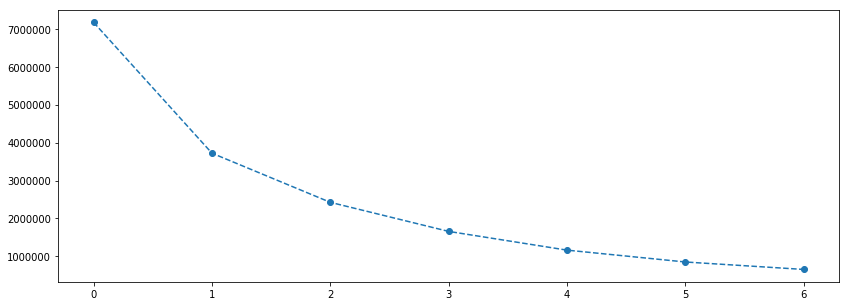

In [155]:
plt.plot(cluster_error,'--o')

In [162]:
cust1 = pd.get_dummies(cust)
km = KMeans(n_clusters= 2)
km.fit(cust1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = pd.DataFrame(km.predict(cust1),columns=['Cluster']).set_index(cust1.index)

cls = pd.concat([cust,labels],axis=1)

### PCA for visualizing the clusters

In [163]:
from sklearn.decomposition import PCA

pca = PCA(2)

cust_pcs = pca.fit_transform(cust1)  

,customer id,gender,age,annual income(k$),score,Cluster
0,17403,Male,56,56,32,0
1,11208,Male,67,64,30,1


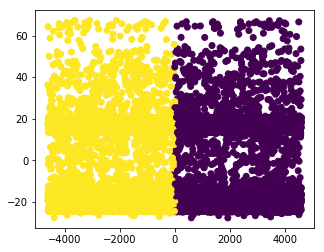

In [166]:
plt.rcParams['figure.figsize'] = [5,4]
plt.scatter(cust_pcs[:,0],cust_pcs[:,1],c =km.predict(cust1) )            ## k =3 here , and output is given as color representation
                                             ## ALL THE ROWS PLOTTED ON SCATTER ARE GIVEN COLORING BASED ON CLUSTER NUMBER

## RECOMMENDER SYSTEM

In [32]:
sales.head(2)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,rating,Month,Year
0,549235,22149,FELTCRAFT 6 FLOWER FRIENDS,3.0,2011-04-07 11:16:00,2.10,17403,United Kingdom,3,4,2011
1,570036,22560,TRADITIONAL MODELLING CLAY,24.0,2011-10-07 10:50:00,1.25,11208,United Kingdom,4,10,2011


In [50]:
sales_recom = sales[['customer id','product id','rating']].groupby(['customer id','product id'])['rating'].mean().reset_index()
sales_recom.head(3)

,customer id,product id,rating
0,10777,21094,3.0
1,10777,21136,4.0
2,10777,21972,4.0


In [43]:
sales_recom_pivot = sales_recom.pivot('customer id','product id','rating').fillna(0)
sales_recom_pivot.head(4)

product id,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214R,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,POST
customer id,,,,,,,,,,,,,,,,,,,,,
10777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
from sklearn.neighbors import NearestNeighbors

knn_cosine = NearestNeighbors(metric ='cosine',algorithm = 'brute')

knn_cosine.fit(sales_recom_pivot)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [45]:
distances,indices = knn_cosine.kneighbors(sales_recom_pivot.iloc[0,:].reshape(1,-1),n_neighbors= 10)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [46]:
distances

array([[2.22044605e-16, 7.04095386e-01, 7.14824087e-01, 7.19461403e-01,
        7.53539107e-01, 7.60474748e-01, 7.63208033e-01, 7.63961473e-01,
        7.64523740e-01, 7.67832211e-01]])

In [49]:
similar_cust = sales_recom_pivot.index[indices]
similar_cust

Int64Index([[10777, 18624, 17785, 12904, 13005, 17497, 17704, 17015, 16194, 16027]], dtype='int64', name='customer id')